In [6]:
#Analyze Purchases During Bad Weather
# Add a 'bad_weather' column based on temperature
merged_data['bad_weather'] = merged_data['Temp in F'] < 60

# Group by 'bad_weather' and count unique transactions
bad_weather_purchases = merged_data.groupby('bad_weather')['invoice_no'].nunique()
print(bad_weather_purchases)

bad_weather
False    45907
True     53550
Name: invoice_no, dtype: int64


In [8]:
#Analyze Weekend vs. Weekday Shopping
# Add a 'weekend' column
merged_data['invoice_date'] = pd.to_datetime(merged_data['invoice_date'], format='%d/%m/%Y')
merged_data['weekend'] = merged_data['invoice_date'].dt.dayofweek >= 5

# Group by 'weekend' and count unique transactions
weekend_purchases = merged_data.groupby('weekend')['invoice_no'].nunique()
print(weekend_purchases)

weekend
False    71196
True     28261
Name: invoice_no, dtype: int64


In [9]:
# Group by 'age', 'gender', and 'category', then sum the 'USD Price' for each group
spending_by_age_gender_category = merged_data.groupby(['age', 'gender', 'category'])['USD Price'].sum().reset_index()

# To find the maximum spending category for each age and gender group
max_spending_by_age_gender = spending_by_age_gender_category.loc[spending_by_age_gender_category.groupby(['age', 'gender'])['USD Price'].idxmax()]

print(max_spending_by_age_gender)

     age  gender  category     USD Price
1     18  Female  Clothing  49251.954378
9     18    Male  Clothing  19798.229636
17    19  Female  Clothing  47446.273963
25    19    Male  Clothing  18465.037441
33    20  Female  Clothing  48176.512180
..   ...     ...       ...           ...
793   67    Male  Clothing  17035.808492
801   68  Female  Clothing  52257.078603
809   68    Male  Clothing  21446.978875
817   69  Female  Clothing  50435.021675
825   69    Male  Clothing  22767.341617

[104 rows x 4 columns]


In [10]:
#Media spend by gender and by year

# First, ensure 'invoice_date' is in datetime format if not already done
merged_data['invoice_date'] = pd.to_datetime(merged_data['invoice_date'], format='%d/%m/%Y')

# Extract year from 'invoice_date'
merged_data['year'] = merged_data['invoice_date'].dt.year

# Calculate median spend by gender and year
median_spend_by_gender_year = merged_data.groupby(['gender', 'year'])['USD Price'].median().reset_index()

print(median_spend_by_gender_year)

   gender  year  USD Price
0  Female  2021  22.753524
1  Female  2022  21.919601
2  Female  2023  22.483064
3    Male  2021  13.441225
4    Male  2022  13.056770
5    Male  2023  14.689315


In [11]:
#Max and min spend by gender

# Calculate maximum spend by gender and year
max_spend_by_gender_year = merged_data.groupby(['gender', 'year'])['USD Price'].max().reset_index()

# Calculate minimum spend by gender and year
min_spend_by_gender_year = merged_data.groupby(['gender', 'year'])['USD Price'].min().reset_index()

# Print the results
print("Maximum Spend by Gender and Year:\n", max_spend_by_gender_year)
print("\nMinimum Spend by Gender and Year:\n", min_spend_by_gender_year)

Maximum Spend by Gender and Year:
    gender  year    USD Price
0  Female  2021  2493.010211
1  Female  2022  2384.569738
2  Female  2023  2285.754307
3    Male  2021  2290.174276
4    Male  2022  2431.999884
5    Male  2023  2362.340598

Minimum Spend by Gender and Year:
    gender  year  USD Price
0  Female  2021   0.441675
1  Female  2022   0.428126
2  Female  2023   0.488544
3    Male  2021   0.435895
4    Male  2022   0.412946
5    Male  2023   0.503349


In [12]:
#  highest spending amount by year and by gender

# Group by year, gender, and shopping mall, then sum the 'USD Price' for each group
spend_by_year_gender_mall = merged_data.groupby(['year', 'gender', 'shopping_mall'])['USD Price'].sum().reset_index()

# Find the mall with the highest spending amount for each year and gender
highest_spend_mall_by_year_gender = spend_by_year_gender_mall.loc[spend_by_year_gender_mall.groupby(['year', 'gender'])['USD Price'].idxmax()]

print(highest_spend_mall_by_year_gender)

    year  gender     shopping_mall      USD Price
5   2021  Female  Mall of Istanbul  416228.006851
15  2021    Male  Mall of Istanbul  199453.256702
24  2022  Female            Kanyon  426826.439319
35  2022    Male  Mall of Istanbul  201421.147912
45  2023  Female  Mall of Istanbul   80023.850196
54  2023    Male            Kanyon   45847.451109


In [13]:
# highest spending amount by year and gender
merged_data['invoice_date'] = pd.to_datetime(merged_data['invoice_date'], format='%d/%m/%Y')
merged_data['year'] = merged_data['invoice_date'].dt.year

# Group by 'shopping_mall', 'year', 'gender' and sum 'USD Price'
mall_spend_year_gender = merged_data.groupby(['shopping_mall', 'year', 'gender'])['USD Price'].sum().reset_index()

# Determine the mall with the highest spending by year and gender
highest_spend_mall = mall_spend_year_gender.loc[mall_spend_year_gender.groupby(['year', 'gender'])['USD Price'].idxmax()]

print(highest_spend_mall)

       shopping_mall  year  gender      USD Price
30  Mall of Istanbul  2021  Female  416228.006851
31  Mall of Istanbul  2021    Male  199453.256702
26            Kanyon  2022  Female  426826.439319
33  Mall of Istanbul  2022    Male  201421.147912
34  Mall of Istanbul  2023  Female   80023.850196
29            Kanyon  2023    Male   45847.451109


In [14]:
# identify the category with the lowest spending on bad weather days
bad_weather_data = merged_data[merged_data['Temp in F'] < 60]

# Aggregate spending by category for bad weather days
spending_by_category = bad_weather_data.groupby('category')['USD Price'].sum()

# Identify the category with the least spending
least_spending_category = spending_by_category.idxmin()

print(f"The category with the least spending amount on bad weather days is: {least_spending_category}")


The category with the least spending amount on bad weather days is: Souvenir


In [16]:
# dentify the category with the highest spending on bad weather days
spending_by_category_bad_weather = bad_weather_data.groupby('category')['USD Price'].sum()

# Identify the category with the highest spending
highest_spending_category_bad_weather = spending_by_category_bad_weather.idxmax()

print(f"The category with the highest spending amount on bad weather days is: {highest_spending_category_bad_weather}")


The category with the highest spending amount on bad weather days is: Clothing


In [17]:
# pay chart that displays spending by mall, by gender, and by year
spend_by_mall_gender_year = merged_data.groupby(['shopping_mall', 'gender', 'year'])['USD Price'].sum().reset_index()


In [18]:
pivot_table = spend_by_mall_gender_year.pivot_table(values='USD Price', index=['shopping_mall', 'year'], columns='gender', aggfunc='sum').reset_index()


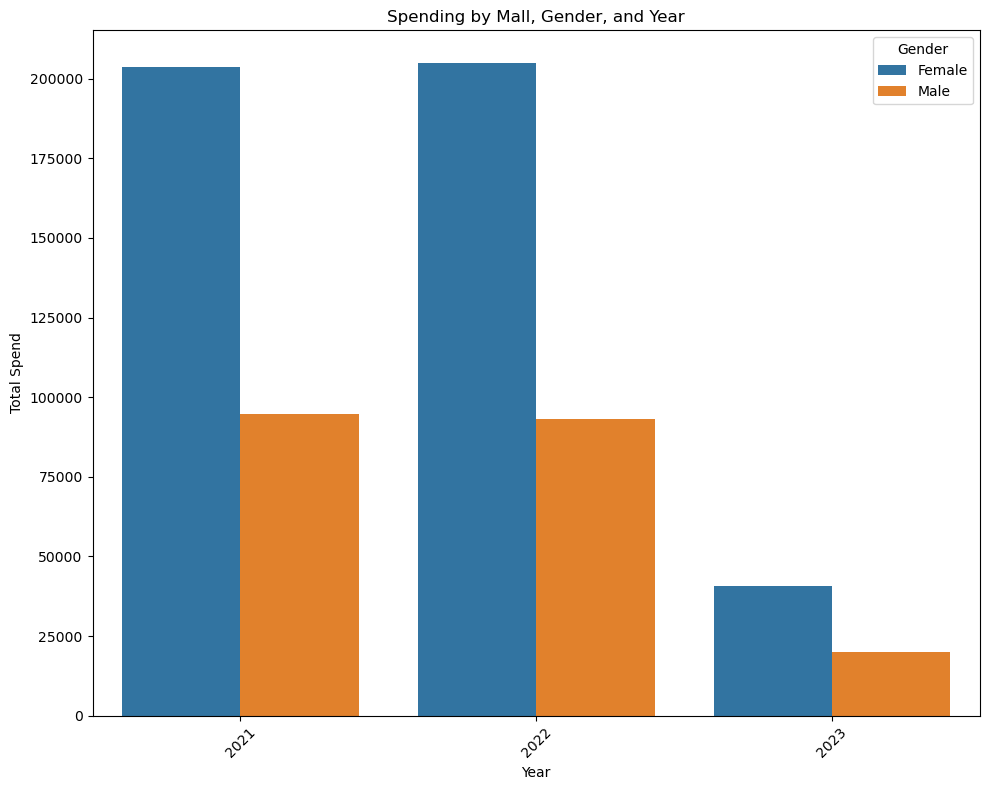

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.barplot(x='year', y='USD Price', hue='gender', data=spend_by_mall_gender_year, errorbar=None)
plt.title('Spending by Mall, Gender, and Year')
plt.xticks(rotation=45)
plt.ylabel('Total Spend')
plt.xlabel('Year')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


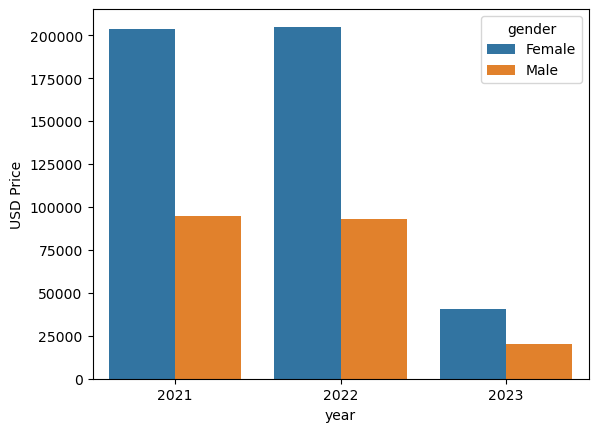

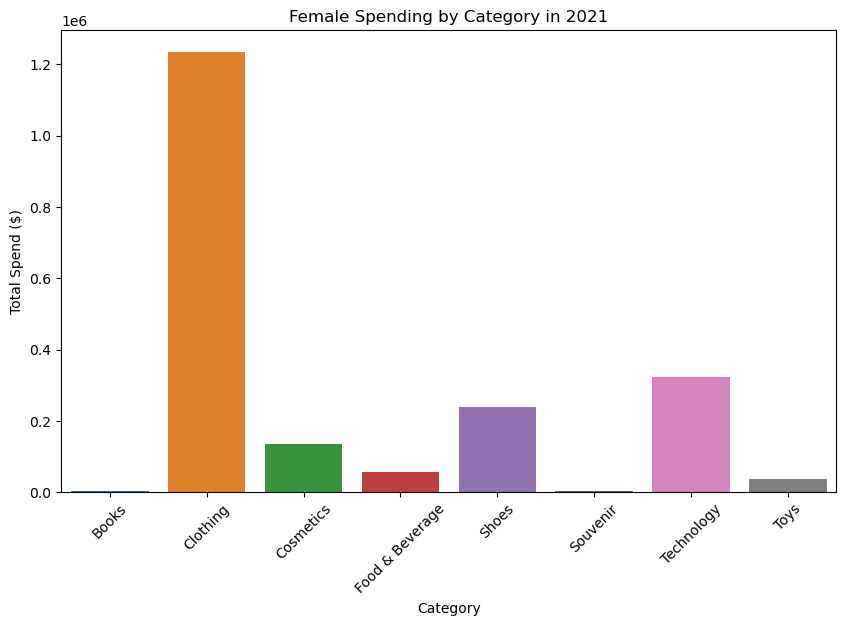

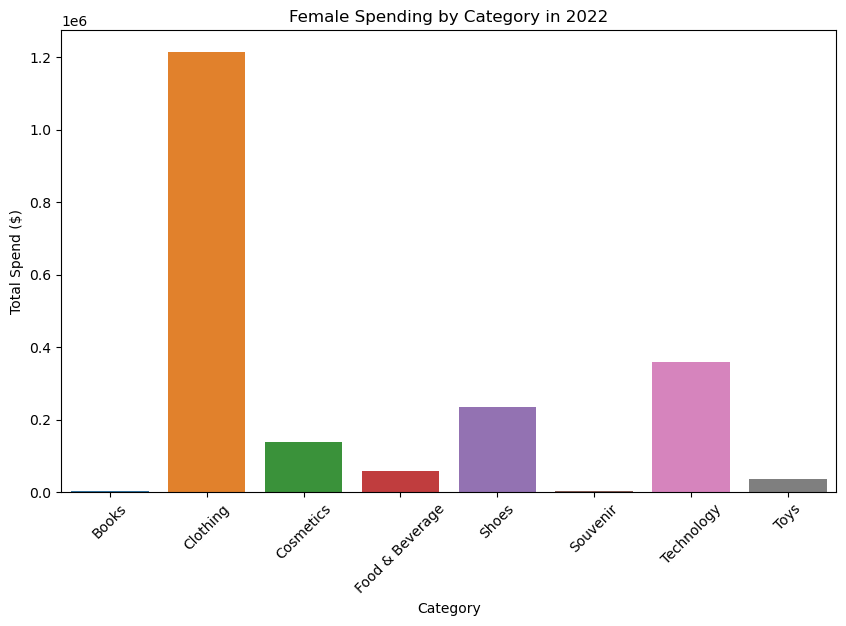

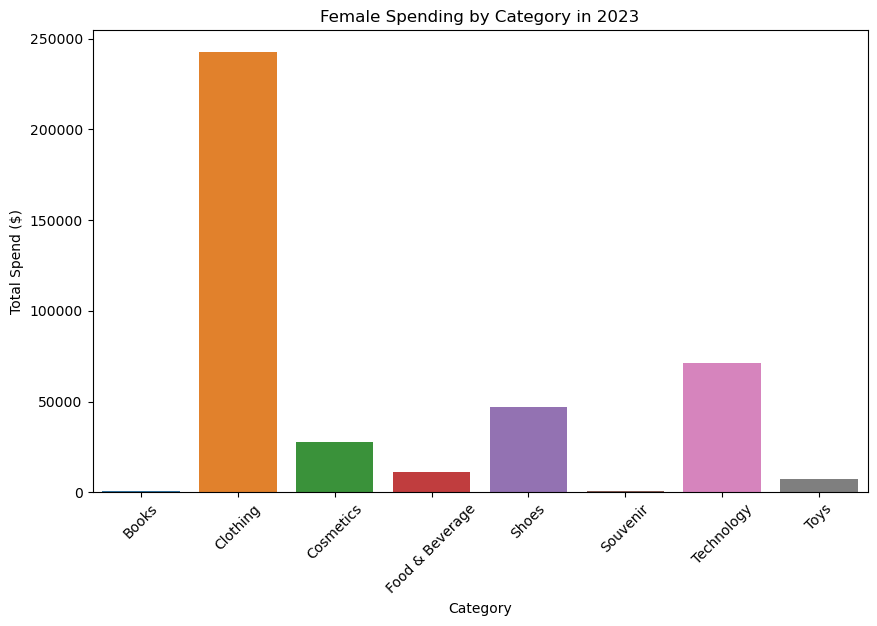

In [21]:

sns.barplot(x='year', y='USD Price', hue='gender', data=spend_by_mall_gender_year, errorbar=None)
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for transactions made by females
female_data = merged_data[merged_data['gender'] == 'Female']

# Aggregate spending by category and year
spending_by_category_year = female_data.groupby(['category', 'year'])['USD Price'].sum().reset_index()

# Plot for each year
for year in spending_by_category_year['year'].unique():
    plt.figure(figsize=(10, 6))
    sns.barplot(x='category', y='USD Price', data=spending_by_category_year[spending_by_category_year['year'] == year], errorbar=None)
    plt.title(f'Female Spending by Category in {year}')
    plt.xticks(rotation=45)
    plt.ylabel('Total Spend ($)')
    plt.xlabel('Category')
    plt.show()


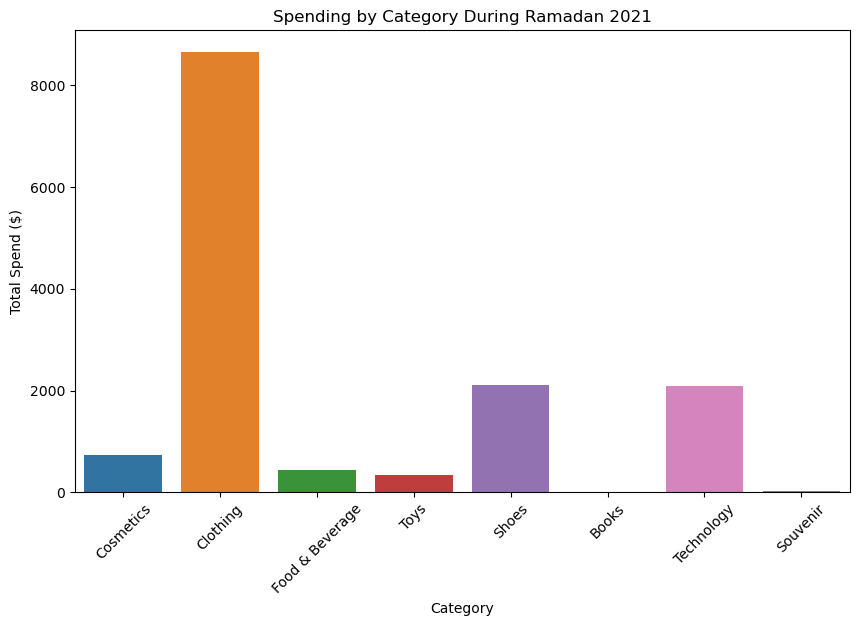

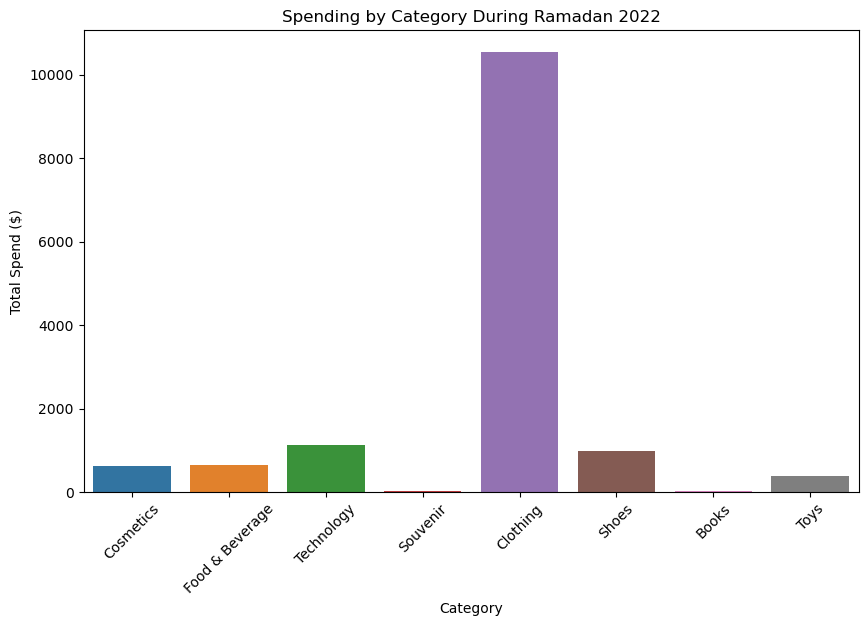

No data available for Ramadan 2023


In [26]:
#spending during Ramadan by year
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define Ramadan dates for 2021, 2022, and 2023
ramadan_dates = {
    2021: pd.to_datetime(['2021-05-08', '2021-05-09']),
    2022: pd.to_datetime(['2022-04-27', '2022-04-28']),
    2023: pd.to_datetime(['2023-04-17', '2023-04-18']),
}

# Load the merged data
path_to_merged_data = "C:\\Users\\JGonzalez3\\Documents\\DataBCampWorkHere\\Project1\\merged_data.csv"
merged_data = pd.read_csv(path_to_merged_data)
merged_data['invoice_date'] = pd.to_datetime(merged_data['invoice_date'], format='%d/%m/%Y')

# Filter the dataset for transactions during Ramadan for each year and visualize the spending
for year, dates in ramadan_dates.items():
    start_date, end_date = dates
    mask = (merged_data['invoice_date'] >= start_date) & (merged_data['invoice_date'] <= end_date)
    period_data = merged_data[mask]
    
    if not period_data.empty:  # Check if the filtered data is not empty
        plt.figure(figsize=(10, 6))
        sns.barplot(x='category', y='USD Price', data=period_data, estimator=sum, errorbar=None)
        plt.title(f'Spending by Category During Ramadan {year}')
        plt.xticks(rotation=45)
        plt.ylabel('Total Spend ($)')
        plt.xlabel('Category')
        plt.show()
    else:
        print(f'No data available for Ramadan {year}')


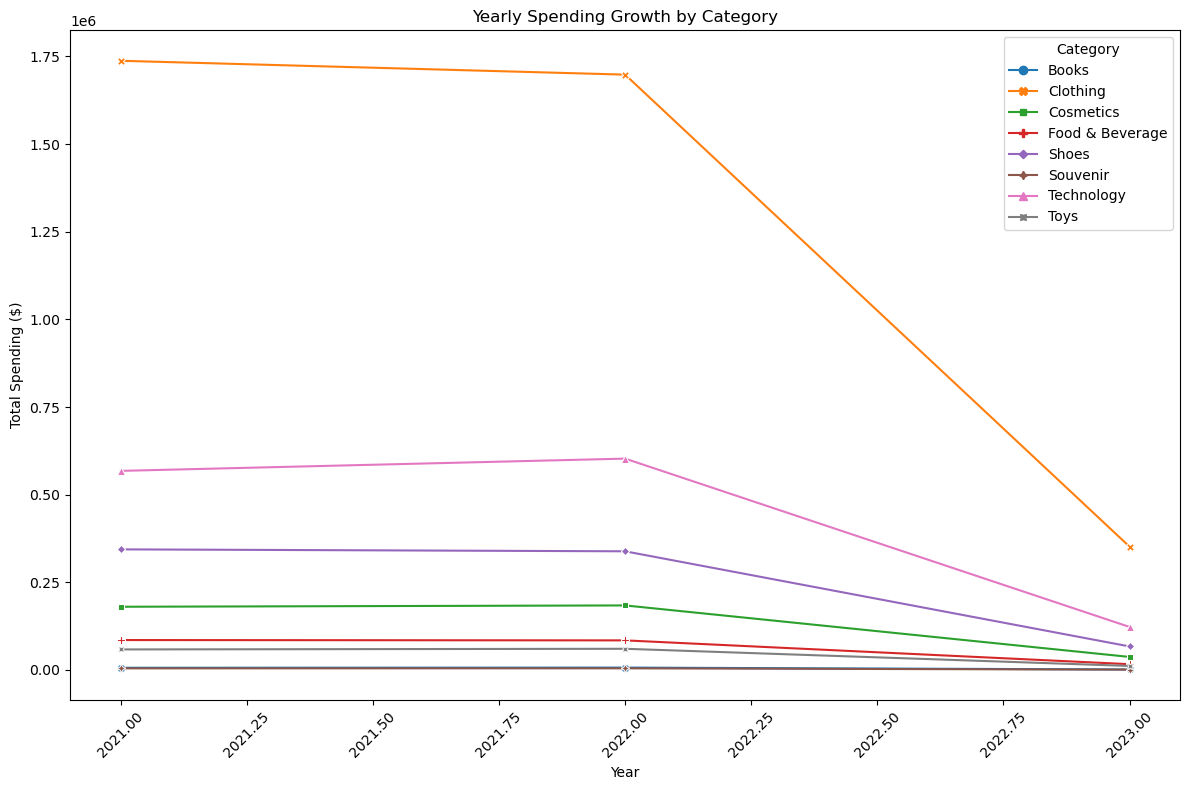

In [30]:
#Spending growth by Category 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Group data by year and category, then sum USD Price for total spending
merged_data['invoice_date'] = pd.to_datetime(merged_data['invoice_date'])
merged_data['year'] = merged_data['invoice_date'].dt.year

yearly_spending = merged_data.groupby(['year', 'category'])['USD Price'].sum().reset_index()

# Pivot data for plotting
pivot_df = yearly_spending.pivot(index='year', columns='category', values='USD Price')

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=pivot_df, dashes=False, markers=True)
plt.title('Yearly Spending Growth by Category')
plt.ylabel('Total Spending ($)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()


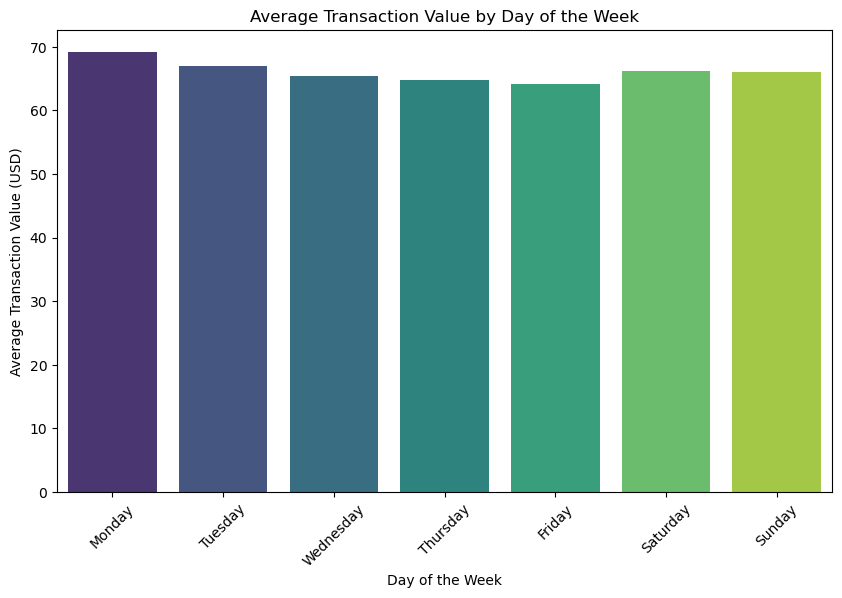

In [32]:
#comparing the average transaction value (USD Price) for each day of the week
merged_data['invoice_date'] = pd.to_datetime(merged_data['invoice_date'])
merged_data['day_of_week'] = merged_data['invoice_date'].dt.day_name()

#Calculate Average Transaction Value by Day of the Week:
merged_data['invoice_date'] = pd.to_datetime(merged_data['invoice_date'])
merged_data['day_of_week'] = merged_data['invoice_date'].dt.day_name()
avg_transaction_by_day = merged_data.groupby('day_of_week')['USD Price'].mean().reset_index()


#Order the Days of the Week:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_transaction_by_day['day_of_week'] = pd.Categorical(avg_transaction_by_day['day_of_week'], categories=days_order, ordered=True)
avg_transaction_by_day = avg_transaction_by_day.sort_values('day_of_week')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='USD Price', data=avg_transaction_by_day, palette='viridis')
plt.title('Average Transaction Value by Day of the Week')
plt.ylabel('Average Transaction Value (USD)')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.show()



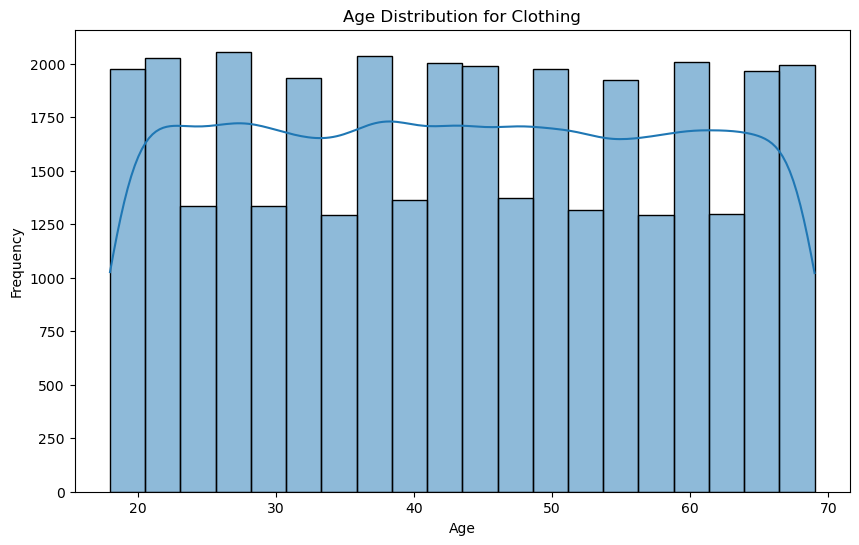

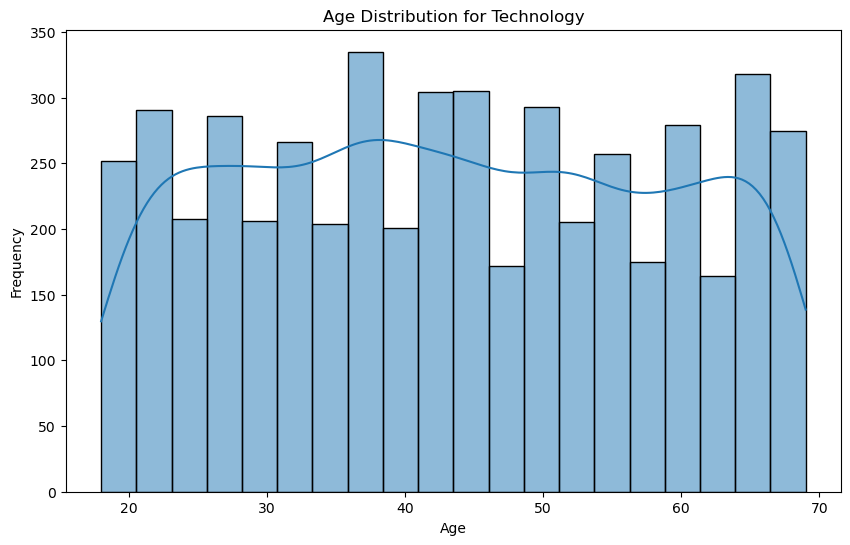

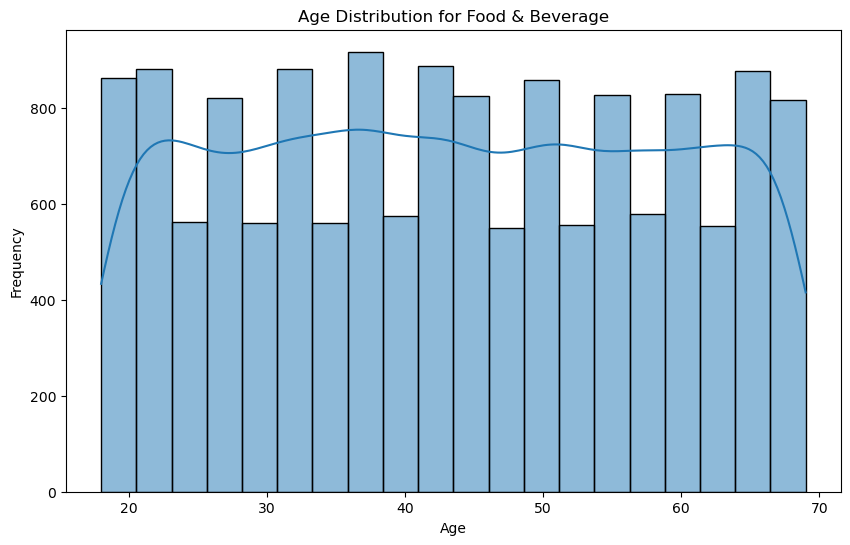

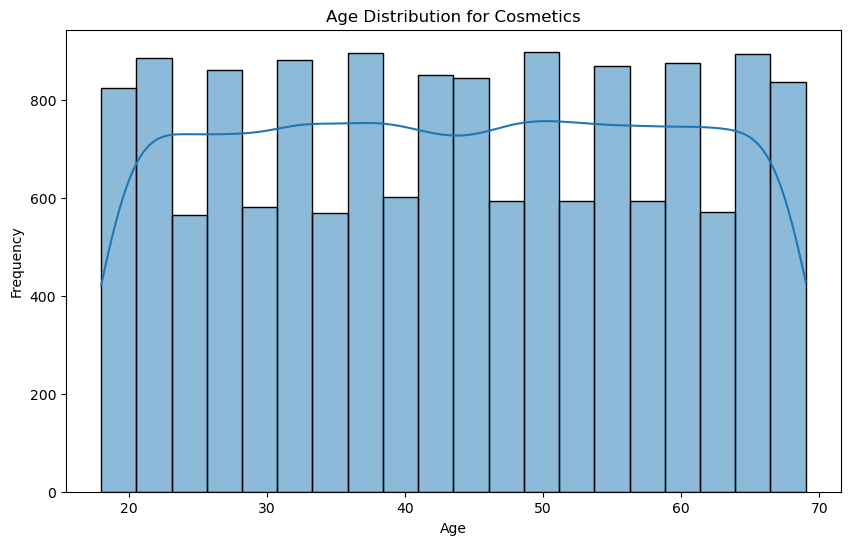

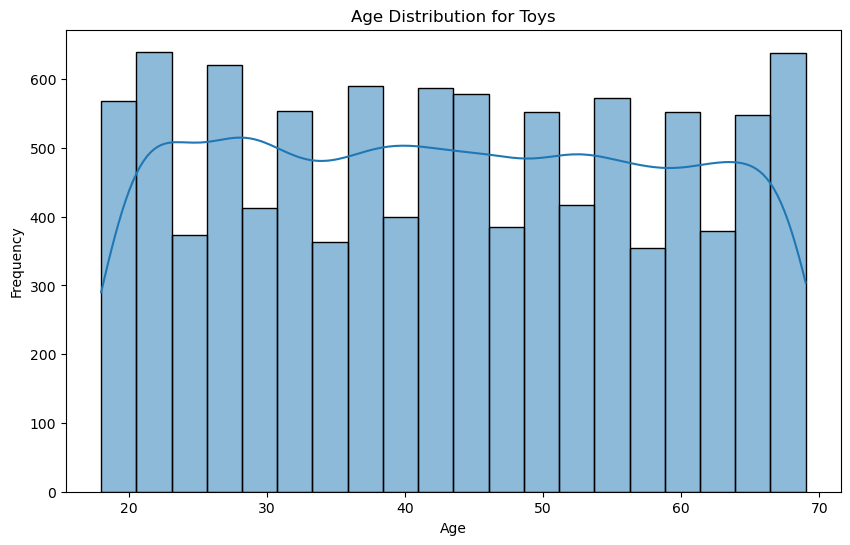

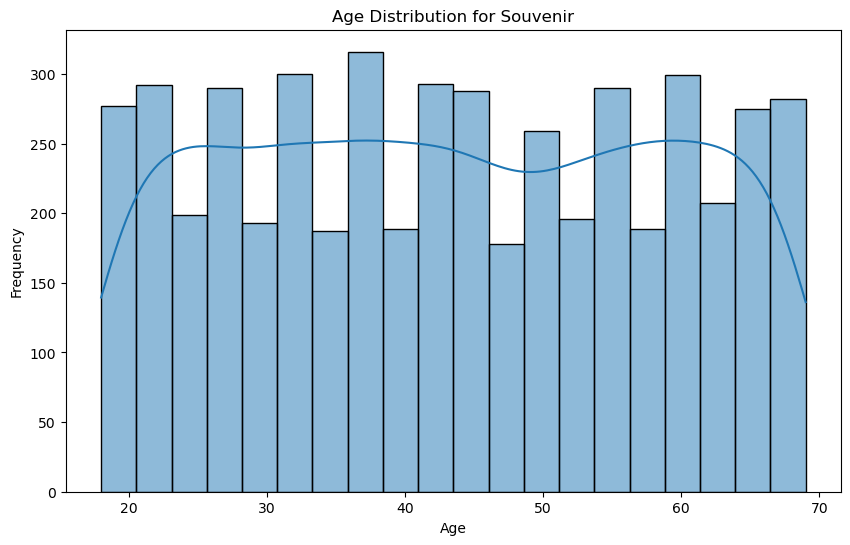

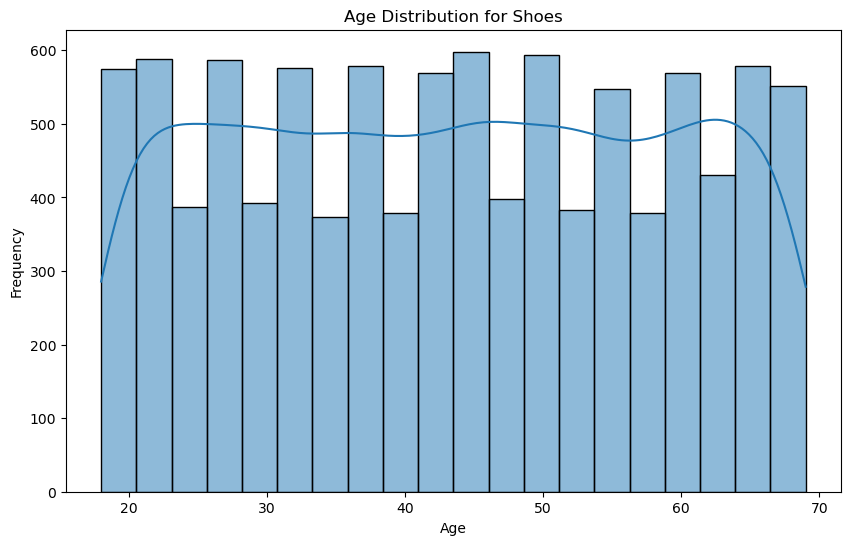

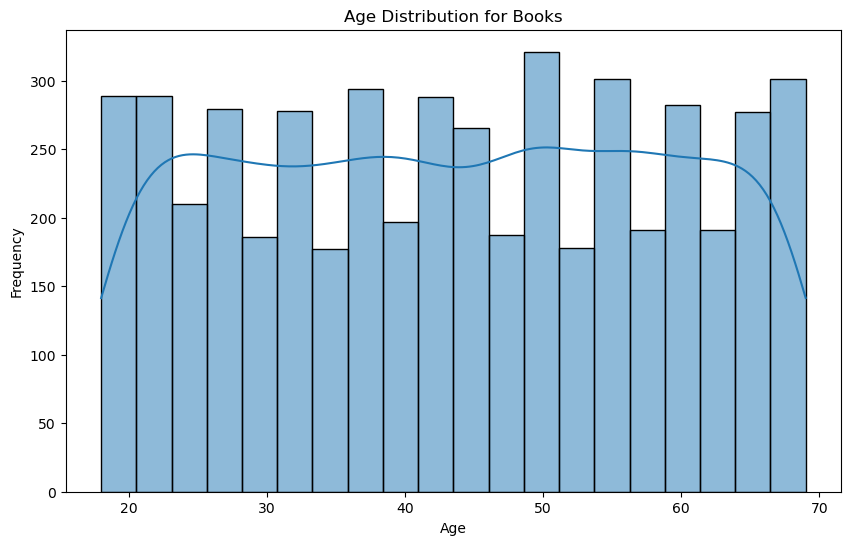

In [33]:
#Customer Age Distribution per Category
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'category' and 'age' columns are in the correct format
# If 'age' is not numeric, convert it: merged_data['age'] = pd.to_numeric(merged_data['age'], errors='coerce')

# Get unique categories
categories = merged_data['category'].unique()

# Plotting
for category in categories:
    plt.figure(figsize=(10, 6))
    category_data = merged_data[merged_data['category'] == category]
    sns.histplot(category_data['age'], bins=20, kde=True)
    plt.title(f'Age Distribution for {category}')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

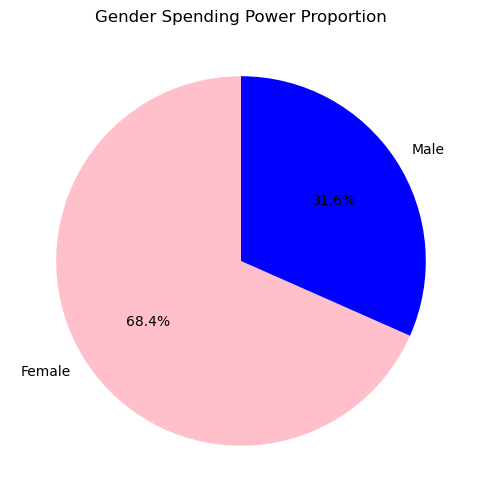

In [36]:
#gender spending power
# Calculate total spending by gender
gender_spending_power = merged_data.groupby('gender')['USD Price'].sum()

# Plotting
colors = ['pink', 'blue']  # Female in pink, Male in blue
plt.figure(figsize=(8, 6))
gender_spending_power.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender Spending Power Proportion')
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts
plt.show()


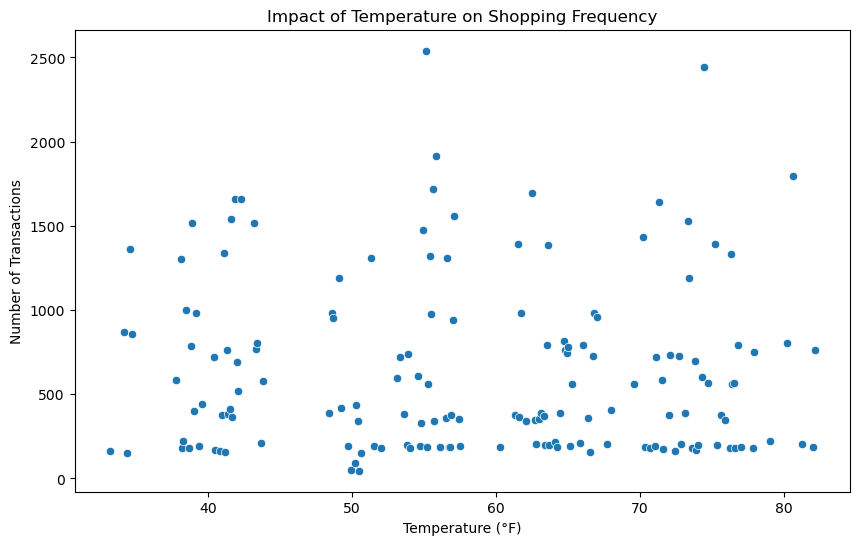

In [37]:
#Weather Impact on Shopping Frequency
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by temperature, counting the number of transactions at each temperature level
transactions_by_temp = merged_data.groupby('Temp in F')['invoice_no'].nunique().reset_index()

# Creating the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp in F', y='invoice_no', data=transactions_by_temp)
plt.title('Impact of Temperature on Shopping Frequency')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of Transactions')
plt.show()
